### Description of Dataset:
#### This dataset contains all the details of the applications on Google Play Store. There are 13 features/variables and more than 10,000 records.Web scraped data of 10k Play Store apps for analysing the Android market

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline


### Data Exploration

In [3]:
df_raw = pd.read_csv('googleplaystore.csv')

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df_raw.shape

(10841, 13)

In [53]:
df_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


### Formatting Columns

In [54]:
df_raw.columns = df_raw.columns.str.replace(' ','_')#replacing the spaces with underscore
df_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [149]:
#Dropping columns
df_raw = df_raw.drop(["Genres", "Android_Ver","Current_Ver","Last_Updated"], axis=1)

In [56]:
df_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


### Handling missing and null values

In [57]:
df_raw.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content_Rating    1
dtype: int64

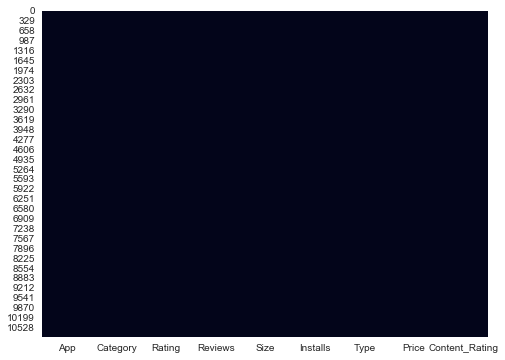

In [195]:
plt.figure(figsize=(8,6))
sns.heatmap(df_raw.isnull(), cbar = False)

(0, 6)

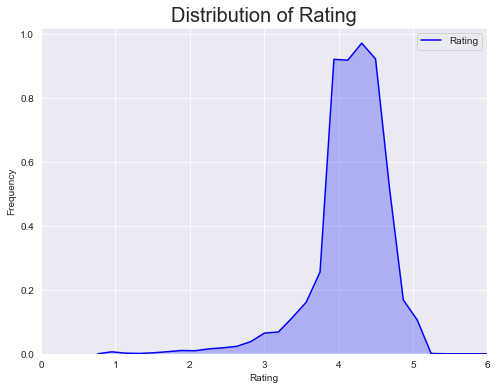

In [128]:
#Distribution of Ratings
plt.figure(figsize=(8,6))
g = sns.kdeplot(df_raw.Rating, color="Blue", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.xlim((0,6))

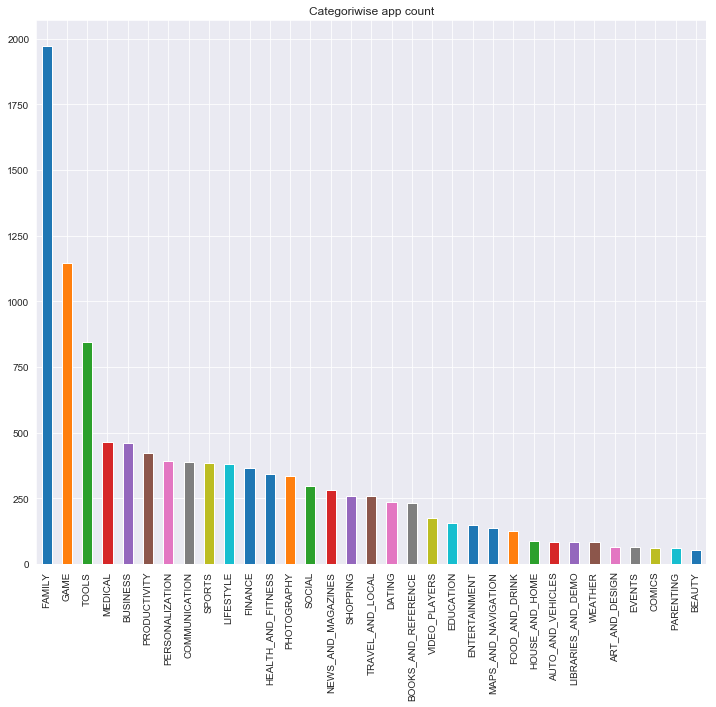

In [129]:
#Distribution of Categories
plt.figure(figsize=(12,10))
df_final.Category.value_counts().plot(kind='bar',title="Categoriwise app count")
plt.show()
sns.set_style('darkgrid')

In [130]:
#Filling missing values with mean
df_raw["Rating"].fillna(round(df_raw["Rating"].mean()) , inplace = True)

In [131]:
df_raw.isnull().sum()
print(df_raw[df_raw.isnull().any(axis=1)].head())

                                           App Category  Rating Reviews  \
9148                 Command & Conquer: Rivals   FAMILY     4.0       0   
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

                     Size Installs Type     Price Content_Rating  
9148   Varies with device        0  NaN         0   Everyone 10+  
10472              1,000+     Free    0  Everyone            NaN  


dropping type and content_rating

In [132]:
df_clean = df_raw.dropna().copy()

In [133]:
df_clean.describe()

,Rating
count,10839.000000
mean,4.165698
std,0.483416
min,1.000000
25%,4.000000
50%,4.200000
75%,4.500000
max,5.000000


In [134]:
df_clean.count()

App               10839
Category          10839
Rating            10839
Reviews           10839
Size              10839
Installs          10839
Type              10839
Price             10839
Content_Rating    10839
dtype: int64

In [135]:
df_clean.Size.value_counts()

Varies with device    1694
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
16M                    149
26M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
                      ... 
25k                      1
779k                     1
219k                     1
874k                     1
103k                     1
50k                      1
7

In [136]:
df_clean['Size'].value_counts()
df_clean.Size=df_clean.Size.replace('Varies with device',np.nan)

In [74]:
#find and replace k as 10^6 and M as 10^9 using RegEx
# df_clean['Size'] = df_clean['Size'].replace(r'[kM]+$','',regex=True).astype(float)*df_clean.Size.str.extract(r'[\d\.]+([kM]+)',expand=False).replace(['k','M'],[10**3,10**6]).astype(int).copy()
# df_clean.head()

In [137]:
df_clean.Size=df_clean.Size.str.replace('k','e+3')
df_clean.Size=df_clean.Size.str.replace('M','e+6')
df_clean.Size.head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

In [138]:
def convert(v):
    try:
        float(v)
        return True
    except ValueError:
        return False

temp=df_clean.Size.apply(lambda x: convert(x))

In [139]:

df_clean.Size=df_clean.Size.replace('Varies with device',np.nan)
df_clean.Size=df_clean.Size.replace('1,000+',1000)

In [140]:
df_clean.Size = pd.to_numeric(df_clean.Size)

In [141]:
def convert(n):
    try:
        float(n)
        return True
    except ValueError:
        return False
temp_arr = df_clean.Size.apply(lambda  x:convert(x))

In [142]:
df_clean.Size.value_counts()

11000000.0    198
12000000.0    196
14000000.0    194
13000000.0    191
15000000.0    184
17000000.0    160
19000000.0    154
26000000.0    149
16000000.0    149
10000000.0    146
25000000.0    143
20000000.0    139
21000000.0    138
24000000.0    136
18000000.0    133
23000000.0    117
22000000.0    114
29000000.0    103
27000000.0     97
28000000.0     95
30000000.0     84
33000000.0     79
3300000.0      77
37000000.0     76
35000000.0     72
31000000.0     70
2900000.0      69
2300000.0      68
2500000.0      68
2800000.0      65
             ... 
82000.0         1
569000.0        1
454000.0        1
695000.0        1
613000.0        1
716000.0        1
585000.0        1
93000.0         1
500000.0        1
220000.0        1
924000.0        1
728000.0        1
67000.0         1
421000.0        1
629000.0        1
460000.0        1
280000.0        1
749000.0        1
190000.0        1
309000.0        1
253000.0        1
913000.0        1
511000.0        1
809000.0        1
940000.0  

In [143]:
df_clean.Size = pd.to_numeric(df_clean.Size).copy()

### Number of installations

In [144]:
df_clean.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Name: Installs, dtype: int64

In [145]:
#df_clean["Installs_numeric"] = df_clean.loc[:,("Installs")].replace('+', '')
#df_clean['Installs'] = df_clean['Installs'].str.replace('+','',inplace=True)
df_clean['Installs_numeric'] = df_clean['Installs'].str.replace('+', "")
df_clean['Installs_numeric'] = df_clean['Installs_numeric'].str.replace(',', "")

In [146]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 10 columns):
App                 10839 non-null object
Category            10839 non-null object
Rating              10839 non-null float64
Reviews             10839 non-null object
Size                9145 non-null float64
Installs            10839 non-null object
Type                10839 non-null object
Price               10839 non-null object
Content_Rating      10839 non-null object
Installs_numeric    10839 non-null object
dtypes: float64(2), object(8)
memory usage: 931.5+ KB


In [147]:
def convert(n):
    try:
        float(n)
        return True
    except ValueError:
        return False
temp_arr = df_clean.Installs_numeric.apply(lambda  x:convert(x))

In [148]:
df_clean.Installs_numeric = pd.to_numeric(df_clean.Installs_numeric)

### Review

In [82]:
df_clean["Reviews"] = (df_clean["Reviews"]).astype("float")

In [83]:
df_clean.to_csv("Cleaned_playstore.csv")

In [85]:
#passing data into a final dataframe
df_final = pd.read_csv('Cleaned_playstore.csv')

## Exploratory Data Analysis

In [86]:
df_final['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
import matplotlib.pyplot as plt

# make the pie circular by setting the aspect ratio to 1
plt.figure(figsize=plt.figaspect(1))
values = [3, 12, 5, 8] 
labels = ['a', 'b', 'c', 'd'] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.show()

Ratio of free to paid apps?

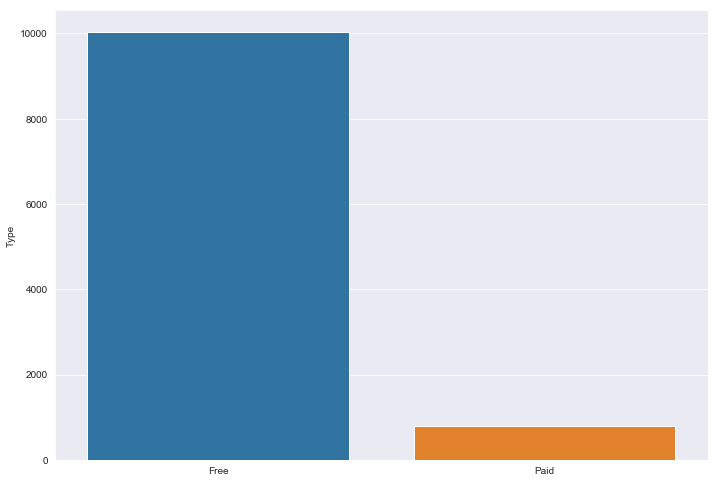

In [184]:

# Data to plot
labels =df_final['Type'].value_counts(sort = True).index
sizes = df_final['Type'].value_counts(sort = True)

#plt.bar(x = labels, height = sizes)
sns.barplot(x = labels, y = sizes)
# colors = ["Green","Yellow"]
# explode = (0,0)  # explode 1st slice

# # Create a circle for the center of the plot
# my_circle=plt.Circle( (0,0), 0.7, color='white')

# # Give color names
# plt.pie(sizes, labels=labels, colors=['green','skyblue'])
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.show()

#rcParams['figure.figsize'] = (8,8)
# Plot

# plt.figure(figsize=(10,10))
# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct='%1.1f%%', shadow=True, startangle=90,)

# plt.title('Percent of Free App Vs Paid apps',size = 20)
# plt.show()

### Analysing Downloads

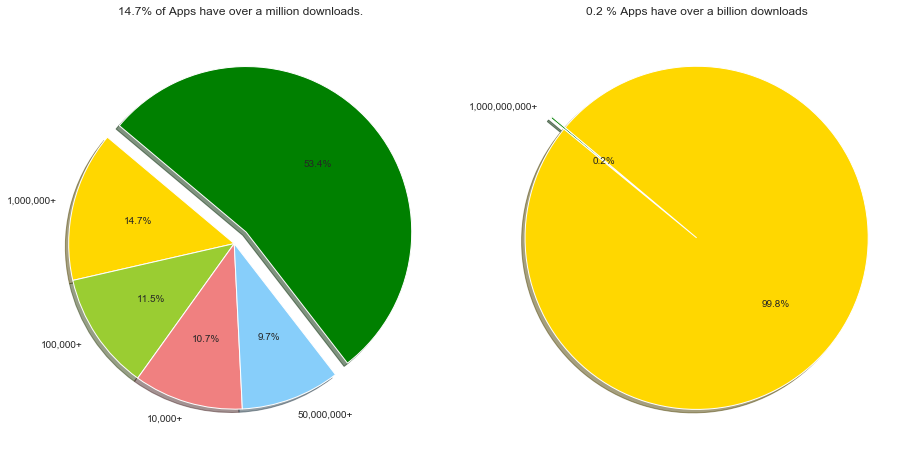

In [182]:
#print(Counter(df["Installs"]).most_common())
labels = ['1,000,000+', '100,000+', '10,000+', '50,000,000+' , '']
sizes = [1418, 1113, 1032, 936 , 5159]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'green']
explode = (0, 0, 0, 0 , 0.1)  

labels2 = ['1,000,000,000+', '']
sizes2 = [20 ,10839]
colors2 = ['green' , 'gold']
explode2 = (0 , 0.1)  

plt.figure(1 , figsize = (15 , 8))
plt.subplot(121)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("14.7% of Apps have over a million downloads.")

plt.subplot(122)
plt.pie(sizes2, explode=explode2, labels=labels2, colors=colors2,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("0.2 % Apps have over a billion downloads")

plt.show()

### Most popular Category

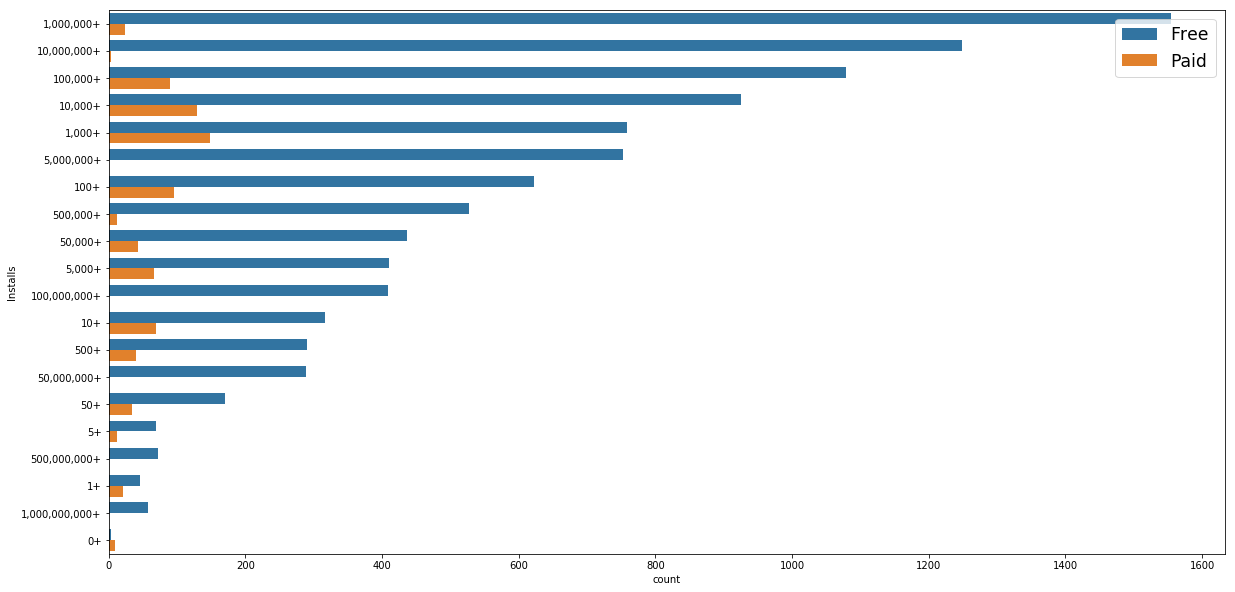

In [90]:
plt.figure(figsize=(20,10))

ax = sns.countplot(y="Installs", data=df_final,hue="Type",order = df_final['Installs'].value_counts().index)
plt.legend(fontsize='xx-large')

Free apps will see a lot more downloads that the paid apps

In [92]:
df_clean['Rating'].describe()

count    10839.000000
mean         4.165698
std          0.483416
min          1.000000
25%          4.000000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

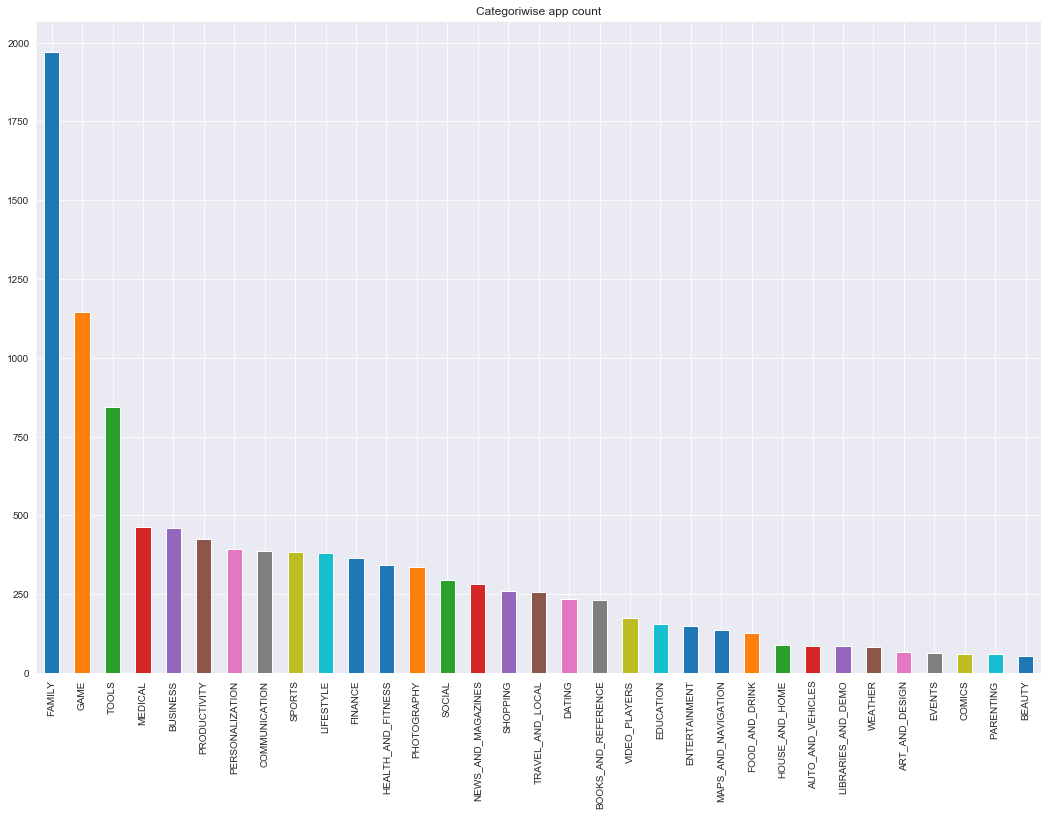

In [186]:
plt.figure(figsize=(18,12))
df_final.Category.value_counts().plot(kind='bar',title="Categoriwise app count")
plt.show()
sns.set_style('darkgrid')


Game and Family are the most represented genre in Play store and Beauty is the least represented genre.

In [187]:
df_final.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Installs_numeric
0,0,6961,ART_AND_DESIGN,4.1,159.0,19000000.0,"10,000+",Free,0,Everyone,10000
1,1,2632,ART_AND_DESIGN,3.9,967.0,14000000.0,"500,000+",Free,0,Everyone,500000
2,2,8655,ART_AND_DESIGN,4.7,87510.0,8700000.0,"5,000,000+",Free,0,Everyone,5000000
3,3,7826,ART_AND_DESIGN,4.5,215644.0,25000000.0,"50,000,000+",Free,0,Teen,50000000
4,4,7021,ART_AND_DESIGN,4.3,967.0,2800000.0,"100,000+",Free,0,Everyone,100000



There is hardly any difference in the rating of applications in each category.

Text(0.5,1,'Rating VS Installs')

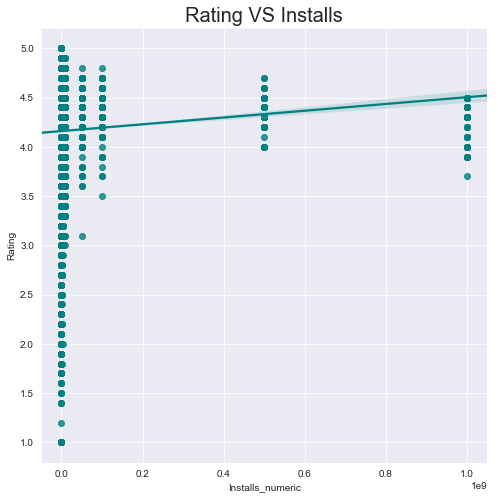

In [190]:
plt.figure(figsize = (8,8))
sns.regplot(x="Installs_numeric", y="Rating", color = 'teal',data=df_final);
plt.title('Rating VS Installs',size = 20)

In [193]:
df_final.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Installs_numeric
0,0,6961,ART_AND_DESIGN,4.1,159.0,19000000.0,"10,000+",Free,0,Everyone,10000
1,1,2632,ART_AND_DESIGN,3.9,967.0,14000000.0,"500,000+",Free,0,Everyone,500000
2,2,8655,ART_AND_DESIGN,4.7,87510.0,8700000.0,"5,000,000+",Free,0,Everyone,5000000
3,3,7826,ART_AND_DESIGN,4.5,215644.0,25000000.0,"50,000,000+",Free,0,Teen,50000000
4,4,7021,ART_AND_DESIGN,4.3,967.0,2800000.0,"100,000+",Free,0,Everyone,100000


From the above graph we can infer that Installation and ratings are, at the very least, positively corelated. More popular apps tend to rake in higher ratings and draw in higher number of reviews.


### Conclusions

    Average rating of (active) apps on Google Play Store is 4.17.

    Users prefer to pay for apps that are light-weight. Thus, a paid app that is bulky might not perform well in the market.

    Most of the top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy.

    Most of the top rated apps are optimally priced between ~1$ to ~30$ - neither too cheap nor too expensive.

    Medical and Family apps are the most expensive and even extend upto 80$.

    Users tend to download a given app more if it has been reviewed by a large number of people.

    Out of all the reviews Health and Fitness apps get, 85% are positive. Game and Social apps receive mixed feedback - 50% positive and 50% negative.



# Reference
1. https://www.kaggle.com/lava18/google-play-store-apps
